In [1]:
# importando algumas bibliotecas
import os
import numpy as np
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt

# definindo os paths para os conjuntos de dados
dataset_path = 'C:/Users/João Gabriel Torres/DC-ped-dataset'
train_set_1_path_ped = dataset_path + '/1/ped_examples'
train_set_1_path_non_ped = dataset_path  + '/1/non-ped_examples'

train_set_2_path_ped = dataset_path + '/2/ped_examples'
train_set_2_path_non_ped = dataset_path  + '/2/non-ped_examples'

train_set_3_path_ped = dataset_path + '/3/ped_examples'
train_set_3_path_non_ped = dataset_path  + '/3/non-ped_examples'

train_set_4_path_ped = dataset_path + '/T1/ped_examples'
train_set_4_path_non_ped = dataset_path  + '/T1/non-ped_examples'

test_set_path_ped = dataset_path + '/T2/ped_examples'
test_set_path_non_ped = dataset_path  + '/T2/non-ped_examples'

In [2]:
# função que o path para as imagens do conjunto de dados e retorna uma matriz numpy correspondente (nesse caso 36 x 18)
def addToSet(images_path):
    images_data = []
    for pgm_image in os.listdir(images_path):
        pgm_img = Image.open(os.path.join(images_path, pgm_image))
        images_data.append(asarray(pgm_img))
    return images_data

# criando arrays do numpy para receber os dados
train_data_ped_1 = np.array(addToSet(train_set_1_path_ped))
train_data_ped_2 = np.array(addToSet(train_set_2_path_ped))
train_data_ped_3 = np.array(addToSet(train_set_3_path_ped))
train_data_ped_4 = np.array(addToSet(train_set_4_path_ped))

# concatenando os dados em 1 conjunto só
ped_train_set = np.concatenate((train_data_ped_1,train_data_ped_2, train_data_ped_3, train_data_ped_4))

# mesmo processo só que com os dados de não pedestres
train_data_non_ped_1 = np.array(addToSet(train_set_1_path_non_ped))
train_data_non_ped_2 = np.array(addToSet(train_set_2_path_non_ped))
train_data_non_ped_3 = np.array(addToSet(train_set_3_path_non_ped))
train_data_non_ped_4 = np.array(addToSet(train_set_4_path_non_ped))

non_ped_train_set = np.concatenate((train_data_non_ped_1, train_data_non_ped_2, train_data_non_ped_3, train_data_non_ped_4))

In [3]:
train_data_ped_1.shape

(4800, 36, 18)

In [4]:
test_data_ped = np.array(addToSet(test_set_path_ped))
test_data_non_ped = np.array(addToSet(test_set_path_non_ped))

test_ped_labels = []

for i in range(len(test_data_ped)):
    test_ped_labels.append(1)

test_ped_labels = np.array(test_ped_labels)


test_non_ped_labels = []

for i in range(len(test_data_non_ped)):
    test_non_ped_labels.append(0)

test_non_ped_labels = np.array(test_non_ped_labels)

non_flattened_test_set = np.array(np.concatenate((test_data_ped, test_data_non_ped)))
non_shulffled_test_set = non_flattened_test_set.reshape(9800, 648)
non_shuffled_test_set_labels = np.array(np.concatenate((test_ped_labels, test_non_ped_labels)))

test_set = non_shulffled_test_set
test_set_labels = non_shuffled_test_set_labels

np.random.seed(17)

test_shuffle_index = np.random.permutation(len(test_set))

test_set, test_set_labels = test_set[test_shuffle_index], test_set_labels[test_shuffle_index]

In [5]:
# criando as labels para as imagens de pedestres dos conjuntos de teste
train_ped_labels = []

for i in range(0, len(ped_train_set)):
    train_ped_labels.append(1) 

# pedestres serão representados pelo valor 1

In [6]:
train_non_ped_labels = []

for i in range(0, len(non_ped_train_set)):
    train_non_ped_labels.append(0) 

# não pedestres serão representados pelo valor 0

In [7]:
# concatenando pedestres com não pedestres e suas respectivas labels
train_non_ped_labels = np.array(train_non_ped_labels)
train_ped_labels = np.array(train_ped_labels)

all_non_shuffled_labels = np.concatenate((train_ped_labels, train_non_ped_labels)) 
non_shuffled_train_set = np.concatenate((ped_train_set, non_ped_train_set))

In [8]:
# conjunto de teste final e labels finais
non_flattened_train_set, train_set_labels = non_shuffled_train_set, all_non_shuffled_labels

train_set = non_flattened_train_set.reshape(39200, 648)

np.random.seed(42)

# embaralhando os conjuntos de dados e labels
shuffle_index = np.random.permutation(len(train_set))
train_set, train_set_labels = train_set[shuffle_index], train_set_labels[shuffle_index]

In [9]:
#from sklearn.neural_network import MLPClassifier
#mlp_classifier = MLPClassifier(hidden_layer_sizes = (150, 100, 50), max_iter = 200, activation = 'relu', solver = 'adam', random_state = 43)
#mlp_classifier.fit(train_set, train_set_labels)

#test_pred = mlp_classifier.predict(test_set)

In [10]:
#def accuracy(confusion_matrix):
#    diagonal_sum = confusion_matrix.trace()
#    sum_of_all_elements = confusion_matrix.sum()
#    return diagonal_sum/sum_of_all_elements

#from  sklearn.metrics import confusion_matrix

#conf_mat = confusion_matrix(test_pred, test_set_labels)
#print("Acurácia: ", accuracy(conf_mat)) 

#alguns_dados = test_set[:10]
#algumas_labels = test_set_labels[:10]

#print("Predições: ", mlp_classifier.predict(alguns_dados))
#print("Rótulos: ", algumas_labels)

In [11]:
#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay(conf_mat).plot()

In [12]:
#from sklearn.model_selection import cross_validate

#metricas = cross_validate(mlp_classifier, train_set, train_set_labels, scoring=tipos_de_metricas, cv=5)


#for met in metricas:
#   print(f"- {met}:")
#   print(f"-- {metricas[met]}")
#   print(f"-- {np.mean(metricas[met])} +- {np.std(metricas[met])}\n")

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, GridSearchCV

grid = [
    {
    'hidden_layer_sizes': [(150, 100, 50), (75, 50, 25), (300, 200, 100)],
    'max_iter': [200],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam']
    },
    {
    'hidden_layer_sizes': [(150, 100, 50), (75, 50, 25), (300, 200, 100)],
    'max_iter': [500],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd']
    }
] 

tipos_de_metricas = ['accuracy', 'precision_macro', 'recall_macro']
mlp_classifier = MLPClassifier()
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=grid, cv=5, refit='f1_macro',scoring=tipos_de_metricas, return_train_score=True)
grid_search.fit(train_set, train_set_labels)

C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Pr

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'activation': ['relu', 'tanh', 'logistic'],
                          'hidden_layer_sizes': [(150, 100, 50), (75, 50, 25),
                                                 (300, 200, 100)],
                          'max_iter': [200], 'solver': ['adam']},
                         {'activation': ['relu', 'tanh', 'logistic'],
                          'hidden_layer_sizes': [(150, 100, 50), (75, 50, 25),
                                                 (300, 200, 100)],
                          'max_iter': [500], 'solver': ['sgd']}],
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [27]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (300, 200, 100),
 'max_iter': 200,
 'solver': 'adam'}

In [32]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_f1_macro"], cvres["params"]):
    print(mean_score, params)

0.9378939452231043 {'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.9225139933359356 {'activation': 'relu', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.9457278700977026 {'activation': 'relu', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.4135010005647268 {'activation': 'tanh', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.40898218699729083 {'activation': 'tanh', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.46409041294681924 {'activation': 'tanh', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.6857833318141277 {'activation': 'logistic', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.7629084177038289 {'activation': 'logistic', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.78951708166893 {'activation': 'logistic', 'hidden_layer_sizes': (300, 20

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_accuracy"], cvres["params"]):
    print(mean_score, params)

0.9379591836734693 {'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.9225765306122449 {'activation': 'relu', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.9457653061224489 {'activation': 'relu', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.5482142857142858 {'activation': 'tanh', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.5436989795918368 {'activation': 'tanh', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.5778061224489796 {'activation': 'tanh', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.7220918367346939 {'activation': 'logistic', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.7666836734693877 {'activation': 'logistic', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.7903061224489797 {'activation': 'logistic', 'hidden_layer_sizes': (300, 20

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_precision_macro"], cvres["params"]):
    print(mean_score, params)

0.938802100259274 {'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.9236769577289652 {'activation': 'relu', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.9462929027460938 {'activation': 'relu', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.5478783373436709 {'activation': 'tanh', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.5219260241647964 {'activation': 'tanh', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.44750149293901903 {'activation': 'tanh', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.6787882044286776 {'activation': 'logistic', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.7856990863553458 {'activation': 'logistic', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.7930546567985646 {'activation': 'logistic', 'hidden_layer_sizes': (300, 20

In [35]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_recall_macro"], cvres["params"]):
    print(mean_score, params)

0.9379239583333334 {'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.9227104166666666 {'activation': 'relu', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.9458208333333333 {'activation': 'relu', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.543575 {'activation': 'tanh', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.5445093750000001 {'activation': 'tanh', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.5743239583333334 {'activation': 'tanh', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}
0.7197791666666667 {'activation': 'logistic', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200, 'solver': 'adam'}
0.7681104166666667 {'activation': 'logistic', 'hidden_layer_sizes': (75, 50, 25), 'max_iter': 200, 'solver': 'adam'}
0.7899249999999999 {'activation': 'logistic', 'hidden_layer_sizes': (300, 200, 100), '

Acurácia:  0.8527551020408163 {'activation': 'relu', 'hidden_layer_sizes': (300, 200, 100), 'max_iter': 200, 'solver': 'adam'}


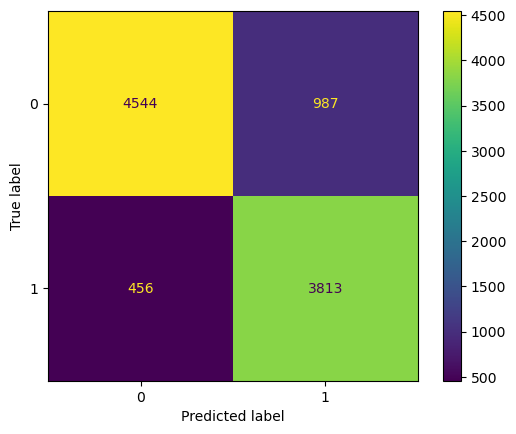

In [43]:
from  sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predict = grid_search.best_estimator_.predict(test_set)

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum/sum_of_all_elements

conf_mat = confusion_matrix(predict, test_set_labels)
print("Acurácia: ", accuracy(conf_mat), grid_search.best_params_) 

ConfusionMatrixDisplay(conf_mat).plot()

In [45]:
import joblib
Grid_MLPClassifier = 'Grid_MLPClassifier.sav'
joblib.dump(grid_search, Grid_MLPClassifier)

['Grid_MLPClassifier.sav']

In [51]:
grid2 = [
    {
        'hidden_layer_sizes': [(300, 200, 100), (450, 250, 150),(600, 300, 200)],
        'max_iter': [200, 300, 400],
        'activation': ['relu'],
        'solver': ['adam'],
        'shuffle': [True, False],
        'verbose': [True],
    }
]
tipos_de_metricas = ['accuracy', 'precision_macro', 'recall_macro']

grid_search_2 = GridSearchCV(estimator=mlp_classifier, param_grid=grid2, cv=5, refit='f1_macro', scoring=tipos_de_metricas, return_train_score=True)
grid_search.fit(train_set, train_set_labels)

C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\ITS_IC\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Pr

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'activation': ['relu', 'tanh', 'logistic'],
                          'hidden_layer_sizes': [(150, 100, 50), (75, 50, 25),
                                                 (300, 200, 100)],
                          'max_iter': [200], 'solver': ['adam']},
                         {'activation': ['relu', 'tanh', 'logistic'],
                          'hidden_layer_sizes': [(150, 100, 50), (75, 50, 25),
                                                 (300, 200, 100)],
                          'max_iter': [500], 'solver': ['sgd']}],
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

39200

In [52]:
grid_search_2.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'